MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

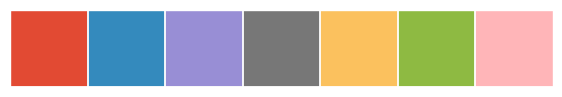

In [44]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
import numpy as np
import six

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM, MLPClassifier

from sklearn.preprocessing import StandardScaler  

plt.style.use('ggplot')
sns.set_context("talk", font_scale=1.4)
sns.palplot(sns.color_palette())
#sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset and make it into a dummy cancer dataset, with 2 attributes
iris = pd.read_csv("iris.csv") 

tumors = iris.rename(index=str, columns = {"SepalLengthCm":"tumorLength", "SepalWidthCm":"tumorWidth"})
tumors['Species'] = tumors['Species'].map({'Iris-setosa': "Malign", 'Iris-versicolor': "Benign", "Iris-virginica":"Benign"})
tumors = tumors.drop('PetalLengthCm', 1)
tumors = tumors.drop('PetalWidthCm',1)
tumors_numerical = tumors.copy()
tumors_numerical['Species'] = tumors_numerical['Species'].map({"Malign":1,"Benign":0})
#tumors_scikit = tumors_numerical.to_dict(orient = 'records')
np_tumors = tumors_numerical.values
X = np_tumors[:,1:3]
y = np_tumors[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Logistic Regression 
logreg = LogisticRegression()
logreg.fit(X, y)

# Neural Networks, Multilayer Perceptron
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,
                    hidden_layer_sizes=(10, 2), random_state=42)

# Scale all the data, train+test. For our purposes, we use all the data as train
X_new = StandardScaler().fit_transform(X)
clf.fit(X_new,y)

#y_pred_prob = logreg.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
#plt.plot(fpr, tpr, label = 'Logistic Regression')
#plt.xlabel("False Positive rate")
#plt.ylabel("True Positive rate")
#plt.title('LR Roc Curve')
#plt.show()


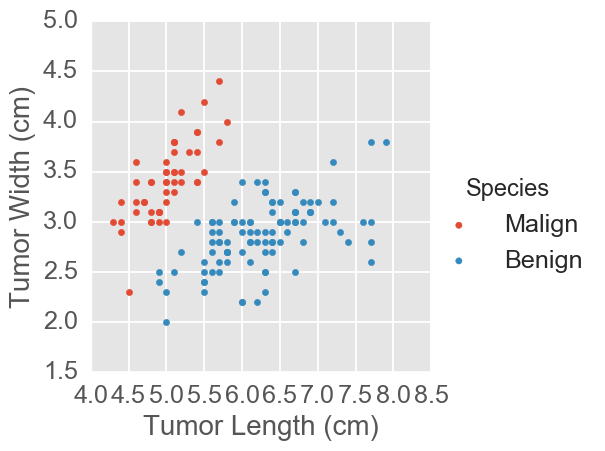

In [41]:
sns.FacetGrid(tumors, hue="Species", size=5).map(plt.scatter, "tumorLength", "tumorWidth").add_legend().\
set_axis_labels("Tumor Length (cm)", "Tumor Width (cm)")

[(1, 9),
 (1, 9),
 None]

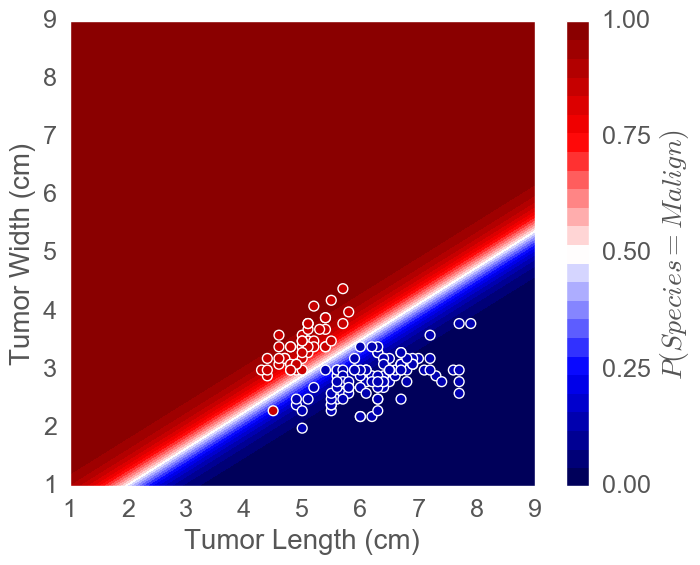

In [45]:
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="seismic",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(Species = Malign)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="seismic", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(1, 9), ylim=(1, 9),
       xlabel="Tumor Length (cm)", ylabel="Tumor Width (cm)")

[(-9, 9),
 (-9, 9),
 None]

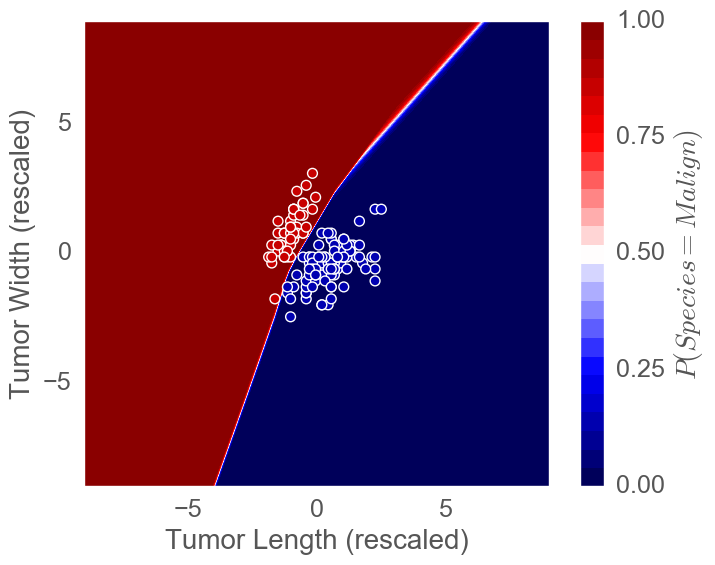

In [47]:
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="seismic",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(Species = Malign)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_new[:,0], X_new[:, 1], c=y, s=50,
           cmap="seismic", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-9, 9), ylim=(-9, 9),
       xlabel="Tumor Length (rescaled)", ylabel="Tumor Width (rescaled)")

In [ ]:
# Scratch here useful methods for K-fold CV and PCA
rs = {}
n_components = [1,2,3,4,5,6,7]
#n_components = [1,2,3,5,10,20,30]
for nc in n_components:
    reduced_data = PCA(n_components=nc).fit_transform(X_train)
    kmeans_pca = KMeans(n_clusters=12, random_state=1337)
    kmeans_pca.fit(reduced_data)
    rs[nc] = adjusted_rand_score(y_train, kmeans_pca.labels_)
    print('nc={}, inertia={}, randscore={}'.format(nc, kmeans_pca.inertia_, rs[nc]))


pca_dummies = PCA(n_components = 4)
pca_dummies.fit(X_train_dummies)
plt.figure()
plt.plot(np.arange(1,pca_dummies.explained_variance_ratio_.size + 1), pca_dummies.explained_variance_ratio_)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
n_eigenvectors_95pc = np.argmax(np.cumsum(pca_dummies.explained_variance_ratio_) > .95) + 1
max_variance = np.max(pca_dummies.explained_variance_ratio_)
plt.vlines(x = n_eigenvectors_95pc, ymin=0, ymax=max_variance, linestyle='--')
plt.annotate('95% variance explained\nby {} eigenvectors'.format(n_eigenvectors_95pc), 
             xy=(n_eigenvectors_95pc, pca_dummies.explained_variance_ratio_[n_eigenvectors_95pc]), 
             xytext=(n_eigenvectors_95pc+10, pca_dummies.explained_variance_ratio_[n_eigenvectors_95pc]+.05),
             arrowprops=dict(facecolor='black', shrink=0.05),)
plt.margins(0.1, tight=True)
plt.show()


######### 
# Question is how many components do you train it with. 
# that's why you plot the variance ratio first to see where you have 95%
pca = PCA(n_components = X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)

# Here we can change it and add the decision tree if we want. 
clfs = [GaussianNB(), DecisionTreeClassifier(criterion='entropy',max_depth =3,random_state=1337)]

# doesn't make sense to use GNB
labels = ['GNB','DecisionTreeClassifier']
data = [X_train, X_train_pca]
n_folds = 5
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1337)

score_array = np.zeros((len(clfs), cv.n_splits))

for ii, clf in enumerate(clfs):
    for jj, (train_idx, valid_idx) in enumerate(cv.split(data[ii])):
        X_tr = data[ii][train_idx,:]
        X_val = data[ii][valid_idx,:]
        y_tr = y_train[train_idx]
        y_val = y_train[valid_idx]
        clf.fit(X_tr,y_tr)
        score_array[ii,jj] = clf.score(X_val, y_val)

        
print(pd.DataFrame.from_dict(
        {'Model': labels, 
         'Mean Accuracy':np.mean(score_array,axis=1), 
         'Standard Error':np.std(score_array,axis=1)/np.sqrt(n_folds)
        })[['Model', 'Mean Accuracy', 'Standard Error']])

plt.figure()        
plt.errorbar(range(len(clfs)), 
            np.mean(score_array,axis=1), 
            yerr=np.std(score_array,axis=1)/np.sqrt(n_folds), 
            fmt='o')
plt.xticks(range(len(clfs)), labels, rotation='vertical')
plt.title('Model comparison')
plt.margins(0.1, tight=True)
plt.show()
